In [1]:
# import the necessary packages
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import numpy as np

# Parameters

In [2]:
epochs = 1000
alpha = 0.1
s_batch = 32

In [3]:
n_features = 2

# utility functions

In [4]:
def sigmoid_activation(x):
	# compute and return the sigmoid activation value for a
	# given input value
	return 1.0 / (1 + np.exp(-x))

In [5]:
def next_batch(X, y, batchSize):
	# loop over our dataset `X` in mini-batches of size `batchSize`
	for i in np.arange(0, X.shape[0], batchSize):
		# yield a tuple of the current batched data and labels
		yield (X[i:i + batchSize], y[i:i + batchSize])

# The function

# Gradient Function

In [6]:
def calc_gradint(X,error):
    return X.T.dot(error) / X.shape[0];

# Generate the dataset

In [7]:
# generate a 2-class classification problem with 250 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=250, n_features=n_features, centers=2,
	cluster_std=4.0, random_state=95)
 
# insert a column of 1's as the first entry in the feature
# vector -- this args["epochs"]is a little trick that allows us to treat
# the bias as a trainable parameter *within* the weight matrix
# rather than an entirely separate variable
X = np.c_[np.ones((X.shape[0])), X]
 
# initialize our weight matrix such it has the same number of
# columns as our input features
W = np.random.uniform(size=(X.shape[1],))
 
# initialize a list to store the loss value for each epoch
lossHistory = []

# Run the SGD

In [8]:
# loop over the desired number of epochs
for epoch in np.arange(0, epochs):
	# take the dot product between our features `X` and the
	# weight matrix `W`, then pass this value through the
	# sigmoid activation function, thereby giving us our
	# predictions on the dataset
	preds = sigmoid_activation(X.dot(W))
 
	# now that we have our predictions, we need to determine
	# our `error`, which is the difference between our predictions
	# and the true values
	error = preds - y
 
	# given our `error`, we can compute the total loss value as
	# the sum of squared loss -- ideally, our loss should
	# decrease as we continue training
	loss = np.sum(error ** 2)
	lossHistory.append(loss)
	print("[INFO] epoch #{}, loss={:.7f}".format(epoch + 1, loss))   
    
    
    # the gradient update is therefore the dot product between
	# the transpose of `X` and our error, scaled by the total
	# number of data points in `X`
	gradient = calc_gradint(X,error)
 
	# in the update stage, all we need to do is nudge our weight
	# matrix in the negative direction of the gradient (hence the
	# term "gradient descent" by taking a small step towards a
	# set of "more optimal" parameters
	W += -alpha * gradient


[INFO] epoch #1, loss=5.3853944
[INFO] epoch #2, loss=5.2999565
[INFO] epoch #3, loss=5.2217998
[INFO] epoch #4, loss=5.1507264
[INFO] epoch #5, loss=5.0864369
[INFO] epoch #6, loss=5.0285442
[INFO] epoch #7, loss=4.9765970
[INFO] epoch #8, loss=4.9301062
[INFO] epoch #9, loss=4.8885684
[INFO] epoch #10, loss=4.8514861
[INFO] epoch #11, loss=4.8183828
[INFO] epoch #12, loss=4.7888124
[INFO] epoch #13, loss=4.7623651
[INFO] epoch #14, loss=4.7386699
[INFO] epoch #15, loss=4.7173945
[INFO] epoch #16, loss=4.6982439
[INFO] epoch #17, loss=4.6809575
[INFO] epoch #18, loss=4.6653067
[INFO] epoch #19, loss=4.6510909
[INFO] epoch #20, loss=4.6381352
[INFO] epoch #21, loss=4.6262869
[INFO] epoch #22, loss=4.6154127
[INFO] epoch #23, loss=4.6053965
[INFO] epoch #24, loss=4.5961371
[INFO] epoch #25, loss=4.5875460
[INFO] epoch #26, loss=4.5795461
[INFO] epoch #27, loss=4.5720699
[INFO] epoch #28, loss=4.5650583
[INFO] epoch #29, loss=4.5584594
[INFO] epoch #30, loss=4.5522280
[INFO] epoch #31, l

# Sample Predictions

In [9]:
# to demonstrate how to use our weight matrix as a classifier,
# let's look over our a sample of training examples
for i in np.random.choice(250, 10):
	# compute the prediction by taking the dot product of the
	# current feature vector with the weight matrix W, then
	# passing it through the sigmoid activation function
	activation = sigmoid_activation(X[i].dot(W))
 
	# the sigmoid function is defined over the range y=[0, 1],
	# so we can use 0.5 as our threshold -- if `activation` is
	# below 0.5, it's class `0`; otherwise it's class `1`
	label = 0 if activation < 0.5 else 1
 
	# show our output classification
	print("activation={:.4f}; predicted_label={}, true_label={}".format(activation, label, y[i]))

activation=0.0001; predicted_label=0, true_label=0
activation=0.9395; predicted_label=1, true_label=1
activation=0.9998; predicted_label=1, true_label=1
activation=0.9999; predicted_label=1, true_label=1
activation=0.0018; predicted_label=0, true_label=0
activation=1.0000; predicted_label=1, true_label=1
activation=0.9998; predicted_label=1, true_label=1
activation=0.0086; predicted_label=0, true_label=0
activation=0.9974; predicted_label=1, true_label=1
activation=0.6339; predicted_label=1, true_label=0


# Calculating accuracy

In [10]:
def get_precision(X,W,y):
    prediction = sigmoid_activation(X.dot(W));
    error = (np.sign( np.multiply(prediction-0.5,y-0.5) )+1)/2;
#     return np.mean(error);
    return np.mean(error);
#     return error

In [11]:
get_precision(X,W,y)

0.98399999999999999

# plot Training Loss

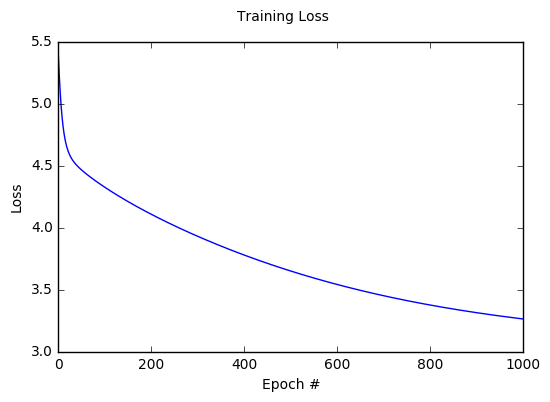

In [12]:
# construct a figure that plots the loss over time
fig = plt.figure()
plt.plot(np.arange(0, epochs), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()